# Simple_linear_regression(Salary_data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
salary=pd.read_csv('Salary_Data.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [4]:
salary.duplicated().sum()

0

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

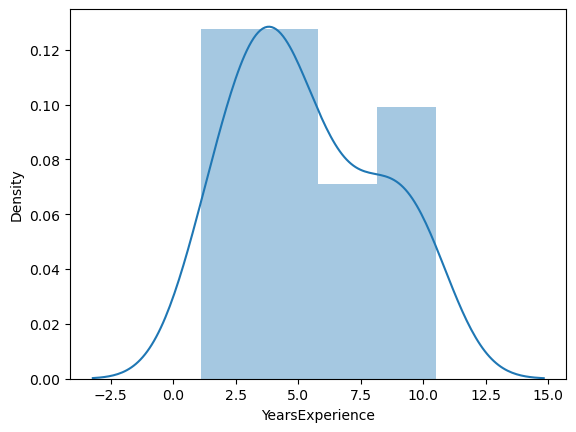

In [5]:
import seaborn as sns
sns.distplot(salary['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

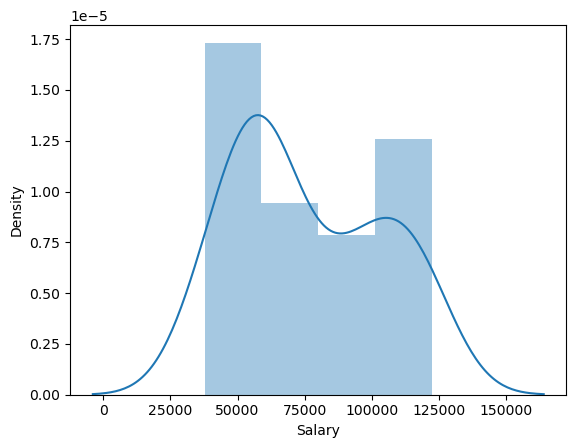

In [6]:
sns.distplot(salary['Salary'])

In [7]:
salary.rename(columns={'YearsExperience':'Year_exp','Salary':'Salary'},inplace=True)

In [8]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Year_exp=ss.fit_transform(salary['Year_exp'].values.reshape(-1,1))

In [9]:
import statsmodels.formula.api as smf
model = smf.ols("Year_exp~Salary",data = salary).fit()

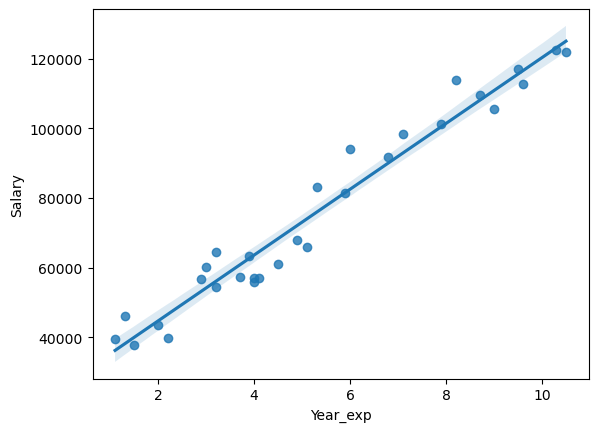

In [10]:
sns.regplot(x="Year_exp", y="Salary", data=salary);

In [11]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [12]:
model = smf.ols("Salary~np.log(Year_exp)",data = salary).fit()

In [13]:
(model.rsquared,model.rsquared_adj)

(0.8538888828756969, 0.8486706286926861)

# Using sklearn method 2

In [14]:
x=salary['Year_exp'].values.reshape(-1, 1)
y=salary['Salary'].values.reshape(-1, 1)

In [15]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,random_state=30,test_size=0.20)

In [16]:
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)

In [18]:
y_pre=lr.predict(x_test)
y_pre

array([[ 72023.51967848],
       [123221.12252239],
       [115636.29247144],
       [ 62542.48211479],
       [108051.46242049],
       [ 35995.57693647]])

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pre)*100

99.44092048209745